In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt


In [6]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load the dataset
data = load_breast_cancer()

# Convert it into a pandas DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add the target column
df['target'] = data.target

# Display the first few rows
print(df.head())


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [9]:

# Features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (scale them to mean 0 and variance 1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [15]:
print(X_train_scaled.shape)  # This will give you (num_samples, num_features)


(455, 30)


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model with the correct input shape (30 features)
model = Sequential([
    Dense(64, activation='relu', input_shape=(30,)),  # 30 input features
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Assuming this is a binary classification task
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=8, validation_data=(X_test_scaled, y_test))


Epoch 1/50


C:\Users\Mohammed Arif\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7135 - loss: 0.4852 - val_accuracy: 0.9649 - val_loss: 0.1547
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9707 - loss: 0.1495 - val_accuracy: 0.9737 - val_loss: 0.0843
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9792 - loss: 0.1033 - val_accuracy: 0.9825 - val_loss: 0.0696
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9873 - loss: 0.0626 - val_accuracy: 0.9649 - val_loss: 0.0700
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9832 - loss: 0.0559 - val_accuracy: 0.9737 - val_loss: 0.0643
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9809 - loss: 0.0614 - val_accuracy: 0.9737 - val_loss: 0.0643
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9913 - loss: 0.0390 - val_accuracy: 0.9825 - val_loss: 0.0636
Epoch 8/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9974 - loss: 0.0210 - val_accuracy: 0.9825 - val_loss: 0.0645
Epo

In [20]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9738 - loss: 0.1735
Test Accuracy: 97.37%


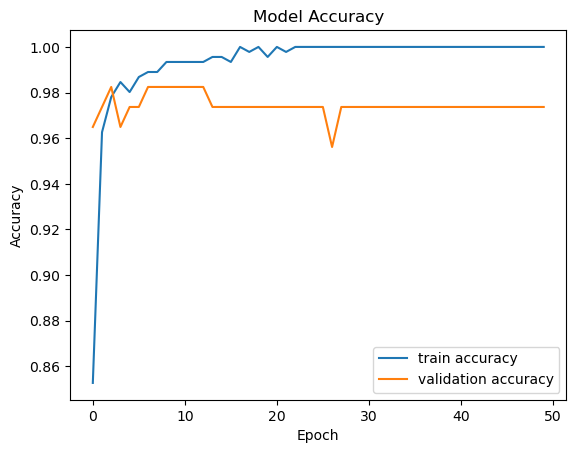

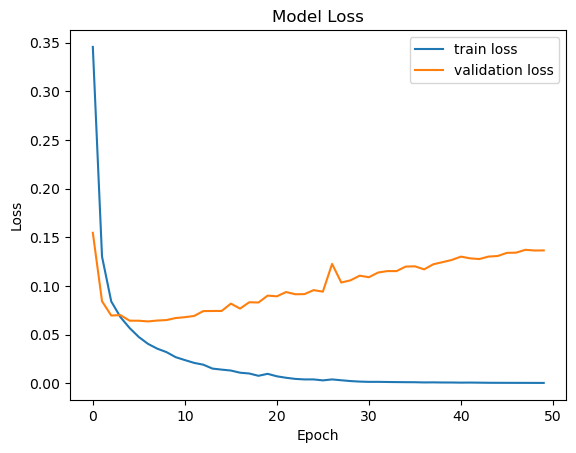

In [22]:
# Plot the accuracy and loss over epochs
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()
